In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
prewitt = np.array([
    [-1, 0, 1],
    [-1,  0, 1],
    [-1, 0, 1]
])

prewitt2 = np.array([
    [-1, -1, -1],
    [0,  0, 0],
    [1, 1, 1]
])

sobel = np.array([
    [-1, 0, 1],
    [-2,  0, 2],
    [-1, 0, 1]
])

sobel2 = np.array([
    [-1, -2, -1],
    [0,  0, 0],
    [1, 2, 1]
])

f5 = np.array([
    [-1, -1, 0],
    [-1,  0, 1],
    [0, 1, 1]
])
if5 = np.array([
    [1, 1, 0],
    [1,  0, -1],
    [0, -1, -1]
])
f51 = np.array([
    [0, -1, -1],
    [1,  0, -1],
    [1, 1, 0]
])
if51 = np.array([
    [0, 1, 1],
    [-1,  0, 1],
    [-1, -1, 0]
])

eke=     np.array([
    [0, 0, 0],
    [0,  0, 1],
    [0, 1, 0]
])

blur=np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25, 0.125],
    [0.0625, 0.125, 0.0625]
])

In [3]:
def GetBI(image):
    biggerImage = np.zeros((image.shape[0]+2, image.shape[1]+2))
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            biggerImage[i][j] = image[i-1][j-1]
    return biggerImage
def targetSize(N, kernel_N):
    pixels = 0

    for i in range(N):
        aux = i + kernel_N
        if aux <= N: pixels += 1
            
    return pixels

def convolve(img, kernel):
    k = kernel.shape[0]
    xSize = targetSize(img.shape[0], k)
    ySize = targetSize(img.shape[1], k)
    

    convolved = np.zeros(shape=(xSize, ySize))
    
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            
            mat = img[i-1:i+2, j-1:j+2]
            convolved[i-1, j-1] = np.sum(np.multiply(mat, kernel))
            
    return convolved

In [4]:
def morphologicalOperator(img, eroIt, dilIt):
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    
    kernelErode = np.ones((5, 5), np.uint8)
    kernelDilate = np.ones((3, 3), np.uint8)
    invert = cv2.bitwise_not(img) 


    dilosion = cv2.dilate(invert, kernelErode, iterations = dilIt)
    erosion = cv2.erode(dilosion, kernelDilate, iterations = eroIt)

    return erosion

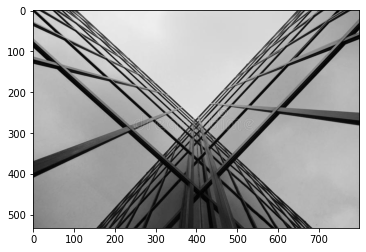

In [5]:
image = cv2.imread("./edificio.jpeg", 0)
plt.figure()
plt.imshow(image, cmap='gray')
plt.show()

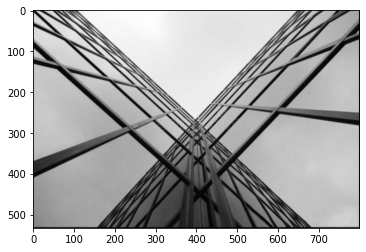

In [6]:
big_image=GetBI(image)
image_blur=convolve(big_image,blur)
plt.figure()
plt.imshow(image_blur, cmap='gray')
plt.show()

In [7]:
big_image.shape

(535, 802)